In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f560e87243183f17fbce1bfcd0fd40ae944077512205abd94c352c1a17f7b5c4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from ydata_profiling import ProfileReport

pd.set_option('display.max_colwidth', None)

In [ ]:
MAX_DATASET_SAMPLES = 10000

In [ ]:
datasets = [
    {
        "name": "Wisconsin Dataset",
        "path": "/content/data.csv",
        "features_numerical": ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean',
                               'fractal_dimension_mean', 'radius_se','texture_se', 'perimeter_se',
                               'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
                               'symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst', 'perimeter_worst',
                               'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                               'symmetry_worst', 'fractal_dimension_worst'],
        #"features_categorical": ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'],
        "target": "diagnosis",
    },

    {
        "name": "Breast Cancer",
        "path": "/content/Breast_Cancer.csv",
        "features_numerical": ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',  ],
        "features_categorical": ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'],
        "target": "Status",
    },

    {
        "name": "Breast Cancer 2",
        "path": "/content/gbsg.csv",
        "features_numerical": ['age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon', 'rfstime'],
        #"features_categorical": ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',],
        "target": "Status",
    },

    {
        "name": "Real Breast Cancer Dataset",
        "path": "/content/BRCA.csv",
        "features_numerical": ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4'],
        "features_categorical": ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'],
        "target": "Patient_Status",
    },

    {
        "name": "Breast Cancer Prediction",
        "path": "/content/breast-cancer-dataset.csv",
        "features_numerical": ['Year','Age', 'Menopause'],
        "features_categorical": ['Tumor Size (cm)', 'Inv-Nodes', 'Breast', 'Metastasis', 'Breast Quadrant', 'History'],
        "target": "Diagnosis Result",
    },

]

In [ ]:
dataset_path = datasets[0]["path"]
df = pd.read_csv(dataset_path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


EDA

In [ ]:
def describe_dataframe(df:pd.DataFrame)->pd.DataFrame:
    df_describe = df.describe()
    df_describe.loc['dtype'] = df_describe.dtypes
    df_describe.loc['null_count'] = df_describe.isnull().sum()
    print("df.shape:", df.shape)
    return df_describe

describe_dataframe(df)

df.shape: (569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,0.0
mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.07972,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8670.0,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,...,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504,NaN
25%,869218.0,11.7,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,...,21.08,84.11,515.3,0.1166,0.1472,0.1145,0.06493,0.2504,0.07146,NaN
50%,906024.0,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.0335,0.1792,...,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004,NaN
75%,8813129.0,15.78,21.8,104.1,782.7,0.1053,0.1304,0.1307,0.074,0.1957,...,29.72,125.4,1084.0,0.146,0.3391,0.3829,0.1614,0.3179,0.09208,NaN
max,911320502.0,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,...,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075,NaN
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Define a custom configuration
from ydata_profiling.config import Settings
custom_config = Settings(
    plot={
        "correlation": {
            "cmap": "magma",  # Change the colormap for the correlation heatmap
            "fontsize": 10       # Adjust font size
        },
        "missing": {
            "cmap": "viridis"    # Customize the colormap for missing values heatmap
        }
    }
)

df = pd.read_csv(datasets[0]['path'])
report = ProfileReport(df, minimal=False, config=custom_config)
report.to_file("/content/example_reports.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
for dataset in datasets:
    name = dataset["name"]
    target = dataset["target"]
    output_file_name = f"profiling_{name}_{target}.html"
    report_title = f"{name} - {target}"
    df = pd.read_csv(dataset['path'])
    if len(df)>MAX_DATASET_SAMPLES: # If too large, reduce Dataset size
        df = df.sample(n=MAX_DATASET_SAMPLES, replace=False, random_state=42)
    report = ProfileReport(df, title=report_title, minimal=False, config=None)
    report.to_file(output_file_name)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#weighted fusion knn

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
##final final prepossess
def preprocess_dataset(dataset):
    print(f"Processing dataset: {dataset['name']}")
    df = pd.read_csv(dataset['path'])

    # Convert column names to lowercase and strip whitespace for consistency
    df.columns = df.columns.str.lower().str.strip()

    # Convert feature names to lowercase and strip whitespace for consistency
    features_numerical_lower = [col.lower().strip() for col in dataset["features_numerical"]]
    X_num = df[features_numerical_lower]

    # Check if 'features_categorical' key exists and is not empty
    if "features_categorical" in dataset and dataset["features_categorical"]:
        # Convert feature names to lowercase and strip whitespace for consistency
        features_categorical_lower = [col.lower().strip() for col in dataset["features_categorical"]]
        X_cat = df[features_categorical_lower]
        # Encode categorical variables
        X_cat = pd.get_dummies(X_cat, drop_first=True)
    else:
        # If no categorical features, create an empty DataFrame
        X_cat = pd.DataFrame()

    # Convert target column name to lowercase and strip whitespace if necessary
    target_lower = dataset["target"].lower().strip()
    y = df[target_lower]

    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Combine features
    X = pd.concat([X_num, X_cat], axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # ----> Replace '#' with NaN before imputation:
    X_train = X_train.replace('#', np.nan) #added line
    X_test = X_test.replace('#', np.nan)   #added line

    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
    X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
    X_test = imputer.transform(X_test)  # Transform test data using the fitted imputer

    # Scale numerical features
    scaler = StandardScaler()
    X_train[:, :len(dataset["features_numerical"])] = scaler.fit_transform(X_train[:, :len(dataset["features_numerical"])])
    X_test[:, :len(dataset["features_numerical"])] = scaler.transform(X_test[:, :len(dataset["features_numerical"])])

    return X_train, X_test, y_train, y_test

In [ ]:
def train_models(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=5)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

    knn.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    return knn, gb

In [ ]:
# Store evaluation results
evaluation_results = []

# Main processing loop
for dataset in datasets:
    X_train, X_test, y_train, y_test = preprocess_dataset(dataset)
    knn, gb = train_models(X_train, y_train)

    # Get models probabilities
    knn_probs = knn.predict_proba(X_test)
    gb_probs = gb.predict_proba(X_test)

    # Get predictions for accuracy calculation
    y_pred_knn = knn.predict(X_test)
    y_pred_gb = gb.predict(X_test)

    # Handle binary and multiclass cases for probabilities and predictions
    if knn_probs.shape[1] == 2:  # Binary classification
        knn_probs = knn_probs[:, 1]
        gb_probs = gb_probs[:, 1]
        # For binary case, y_pred_knn and y_pred_gb from knn.predict and gb.predict
        # are already in the correct format, so no need to change them.
    else:  # Multiclass classification
        # For multiclass, use predict to get the predicted class labels
        y_pred_knn = knn.predict(X_test)
        y_pred_gb = gb.predict(X_test)

    # Fused probabilities and prediction
    fused_probs = 0.3 * knn_probs + 0.7 * gb_probs
    y_pred_fused = (fused_probs >= 0.5).astype(int) if knn_probs.ndim == 1 else np.argmax(fused_probs, axis=1)

    # Get metrics
    knn_acc = accuracy_score(y_test, y_pred_knn)
    gb_acc = accuracy_score(y_test, y_pred_gb)
    fused_acc = accuracy_score(y_test, y_pred_fused)

    # Calculate ROC AUC for binary classification
    if knn_probs.ndim == 1:  # Binary classification
        knn_roc_auc = roc_auc_score(y_test, knn_probs)
        gb_roc_auc = roc_auc_score(y_test, gb_probs)
        fused_roc_auc = roc_auc_score(y_test, fused_probs)
        fpr, tpr, _ = roc_curve(y_test, fused_probs) # Calculate ROC curve for binary classification
    else:  # Multiclass classification
        knn_roc_auc = roc_auc_score(y_test, knn_probs, multi_class='ovr')
        gb_roc_auc = roc_auc_score(y_test, gb_probs, multi_class='ovr')
        fused_roc_auc = roc_auc_score(y_test, fused_probs, multi_class='ovr')
        # Handle ROC curve for multiclass classification using 'ovr'
        from sklearn.preprocessing import label_binarize
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarize labels
        # Get the number of classes
        n_classes = y_test_bin.shape[1]

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], fused_probs[:, i])


    print(f"{dataset['name']} - Accuracy: {fused_acc:.4f}, ROC-AUC: {fused_roc_auc:.4f}")
    evaluation_results.append({
        "dataset": dataset["name"],
        "knn_accuracy": knn_acc,
        "gb_accuracy": gb_acc,
        "fused_accuracy": fused_acc,
        "knn_roc_auc": knn_roc_auc,
        "gb_roc_auc": gb_roc_auc,
        "fused_roc_auc": fused_roc_auc,
        "fpr": fpr,  # Store fpr as a dictionary for multiclass
        "tpr": tpr,  # Store tpr as a dictionary for multiclass
    })

Processing dataset: Wisconsin Dataset
Wisconsin Dataset - Accuracy: 0.9591, ROC-AUC: 0.9956
Processing dataset: Breast Cancer
Breast Cancer - Accuracy: 0.9106, ROC-AUC: 0.8799
Processing dataset: Breast Cancer 2
Breast Cancer 2 - Accuracy: 0.7476, ROC-AUC: 0.7754
Processing dataset: Real Breast Cancer Dataset
Real Breast Cancer Dataset - Accuracy: 0.6796, ROC-AUC: 0.5449
Processing dataset: Breast Cancer Prediction
Breast Cancer Prediction - Accuracy: 0.8750, ROC-AUC: 0.9364


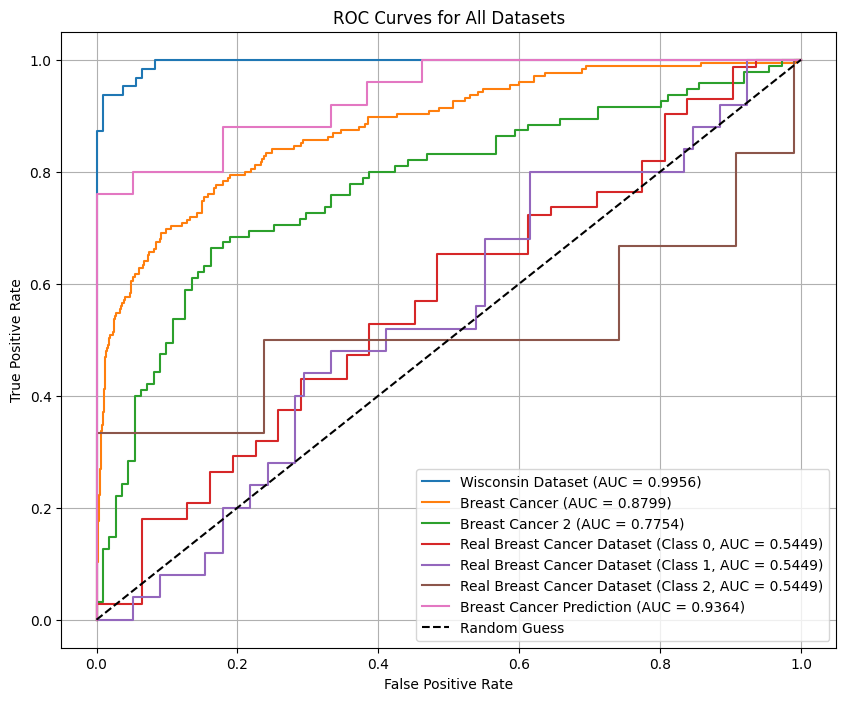

In [ ]:
plt.figure(figsize=(10, 8))
for result in evaluation_results:
    if isinstance(result["fpr"], dict):  # Check if fpr is a dictionary (multiclass)
        for i in result["fpr"].keys():  # Iterate through classes
            plt.plot(result["fpr"][i], result["tpr"][i],
                     label=f'{result["dataset"]} (Class {i}, AUC = {result["fused_roc_auc"]:.4f})')
    else:  # Binary classification
        plt.plot(result["fpr"], result["tpr"],
                 label=f'{result["dataset"]} (AUC = {result["fused_roc_auc"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for All Datasets")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-68-d0bbf430e23b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="dataset", y="fused_accuracy", data=accuracy_data, palette="viridis")


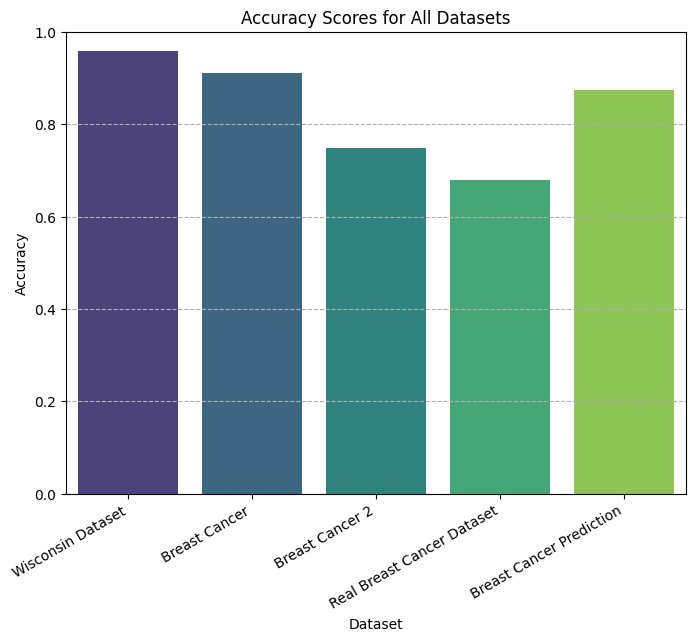

In [ ]:
plt.figure(figsize=(8, 6))
accuracy_data = pd.DataFrame(evaluation_results)
sns.barplot(x="dataset", y="fused_accuracy", data=accuracy_data, palette="viridis")
plt.ylim(0, 1)
plt.title("Accuracy Scores for All Datasets")
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
df_evaluation_results = pd.DataFrame(evaluation_results)
df_evaluation_results

,dataset,knn_accuracy,gb_accuracy,fused_accuracy,knn_roc_auc,gb_roc_auc,fused_roc_auc,fpr,tpr
0,Wisconsin Dataset,0.959064,0.959064,0.959064,0.978689,0.995150,0.995591,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009259259259259259, 0.009259259259259259, 0.037037037037037035, 0.037037037037037035, 0.05555555555555555, 0.05555555555555555, 0.06481481481481481, 0.06481481481481481, 0.08333333333333333, 0.08333333333333333, 0.48148148148148145, 0.5, 0.5185185185185185, 0.5370370370370371, 0.6481481481481481, 0.7314814814814815, 0.7592592592592593, 0.7777777777777778, 0.8240740740740741, 0.8796296296296297, 0.8981481481481481, 0.9259259259259259, 0.9629629629629629, 0.9722222222222222, 0.9907407407407407, 1.0]","[0.0, 0.015873015873015872, 0.047619047619047616, 0.09523809523809523, 0.12698412698412698, 0.15873015873015872, 0.19047619047619047, 0.25396825396825395, 0.2857142857142857, 0.31746031746031744, 0.4603174603174603, 0.49206349206349204, 0.5079365079365079, 0.5714285714285714, 0.873015873015873, 0.873015873015873, 0.9365079365079365, 0.9365079365079365, 0.9523809523809523, 0.9523809523809523, 0.9682539682539683, 0.9682539682539683, 0.9841269841269841, 0.9841269841269841, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
1,Breast Cancer,0.886589,0.913079,0.910596,0.797428,0.882290,0.879862,"[0.0, 0.0, 0.0, 0.000968054211035818, 0.000968054211035818, 0.001936108422071636, 0.001936108422071636, 0.002904162633107454, 0.002904162633107454, 0.003872216844143272, 0.003872216844143272, 0.00484027105517909, 0.00484027105517909, 0.005808325266214908, 0.005808325266214908, 0.006776379477250726, 0.006776379477250726, 0.007744433688286544, 0.007744433688286544, 0.008712487899322363, 0.008712487899322363, 0.010648596321393998, 0.010648596321393998, 0.011616650532429816, 0.011616650532429816, 0.012584704743465635, 0.012584704743465635, 0.013552758954501452, 0.013552758954501452, 0.015488867376573089, 0.015488867376573089, 0.016456921587608905, 0.016456921587608905, 0.018393030009680542, 0.018393030009680542, 0.01936108422071636, 0.01936108422071636, 0.023233301064859633, 0.023233301064859633, 0.02420135527589545, 0.02420135527589545, 0.026137463697967087, 0.026137463697967087, 0.027105517909002903, 0.027105517909002903, 0.03388189738625363, 0.03388189738625363, 0.03484995159728945, 0.03484995159728945, 0.03581800580832527, 0.03581800580832527, 0.03969022265246854, 0.03969022265246854, 0.04065827686350436, 0.04065827686350436, 0.04743465634075508, 0.04743465634075508, 0.0484027105517909, 0.0484027105517909, 0.049370764762826716, 0.049370764762826716, 0.05227492739593417, 0.05227492739593417, 0.05421103581800581, 0.05421103581800581, 0.060019361084220714, 0.060019361084220714, 0.06098741529525654, 0.06098741529525654, 0.06582768635043562, 0.06582768635043562, 0.06679574056147145, 0.06679574056147145, 0.07260406582768635, 0.07260406582768635, 0.07454017424975799, 0.07454017424975799, 0.08228460793804453, 0.08228460793804453, 0.08422071636011616, 0.08422071636011616, 0.09002904162633107, 0.09002904162633107, 0.0909970958373669, 0.0909970958373669, 0.09196515004840271, 0.09196515004840271, 0.09874152952565343, 0.09874152952565343, 0.10551790900290416, 0.10551790900290416, 0.12197483059051308, 0.12197483059051308, 0.1287512100677638, 0.1287512100677638, 0.13262342691190707, 0.13262342691190707, 0.14327202323330107, 0.14327202323330107, 0.15004840271055178, ...]","[0.0, 0.005714285714285714, 0.08, 0.08, 0.10285714285714286, 0.10285714285714286, 0.17714285714285713, 0.17714285714285713, 0.21142857142857144, 0.21142857142857144, 0.22285714285714286, 0.22285714285714286, 0.26857142857142857, 0.26857142857142857, 0.2857142857142857, 0.2857142857142857, 0.33714285714285713, 0.33714285714285713, 0.3485714285714286, 0.3485714285714286, 0.37142857142857144, 0.37142857142857144, 0.4114285714285714, 0.4114285714285714, 0.44571428571428573, 0.44571428571428573, 0.4685714285714286, 0.4685

In [ ]:
df_evaluation_results.describe()

,knn_accuracy,gb_accuracy,fused_accuracy,knn_roc_auc,gb_roc_auc,fused_roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.812304,0.830770,0.834369,0.799752,0.816666,0.826447
std,0.139907,0.116891,0.116720,0.156438,0.199792,0.177064
min,0.650485,0.679612,0.679612,0.602314,0.488160,0.544934
25%,0.674757,0.742718,0.747573,0.694689,0.781318,0.775439
50%,0.886589,0.859375,0.875000,0.797428,0.882290,0.879862
75%,0.890625,0.913079,0.910596,0.925641,0.936410,0.936410
max,0.959064,0.959064,0.959064,0.978689,0.995150,0.995591
